<a href="https://colab.research.google.com/github/crosoriom/Senales-y-sistemas/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 _ señales y sitemas

### Valeria Lopez
### Juan David Lopez
### Cristian Camilo Osorio

Empezamos importando algunas de la librerías con las que vamos a trabajar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Punto 1
Para el primer punto, se desea descomponer en frecuencias la señal de tiempo $ x(t) = |A cos (2 \pi F_{0} t)|^2$. Esto puede hacerse en multiples formas, pero como es una función trigonométrica, puede descomponerse a la serie de Fourier.
Dado que
$$
\omega_0 = \frac{2\pi}{T}\\
T = \frac{1}{F_0}\\
\omega_0 = 2\pi F_0
$$
La función puede reescribirse como $A^{2}cos^{2}(\omega_0 t)$. Al aplicar la identidad trigonométrica $cos^{2}(\theta) = \frac{1 + cos(2\theta)}{2}$ se obtiene la función expresada en serie de fourier trigonométrica, con coeficientes $a_0 = \frac{A^2}{2}$ y $a_2 = \frac{A^2}{2}$.
$$
x(t) = \frac{A^2}{2} + \frac{A^2}{2} cos(2\omega_0 t)
$$

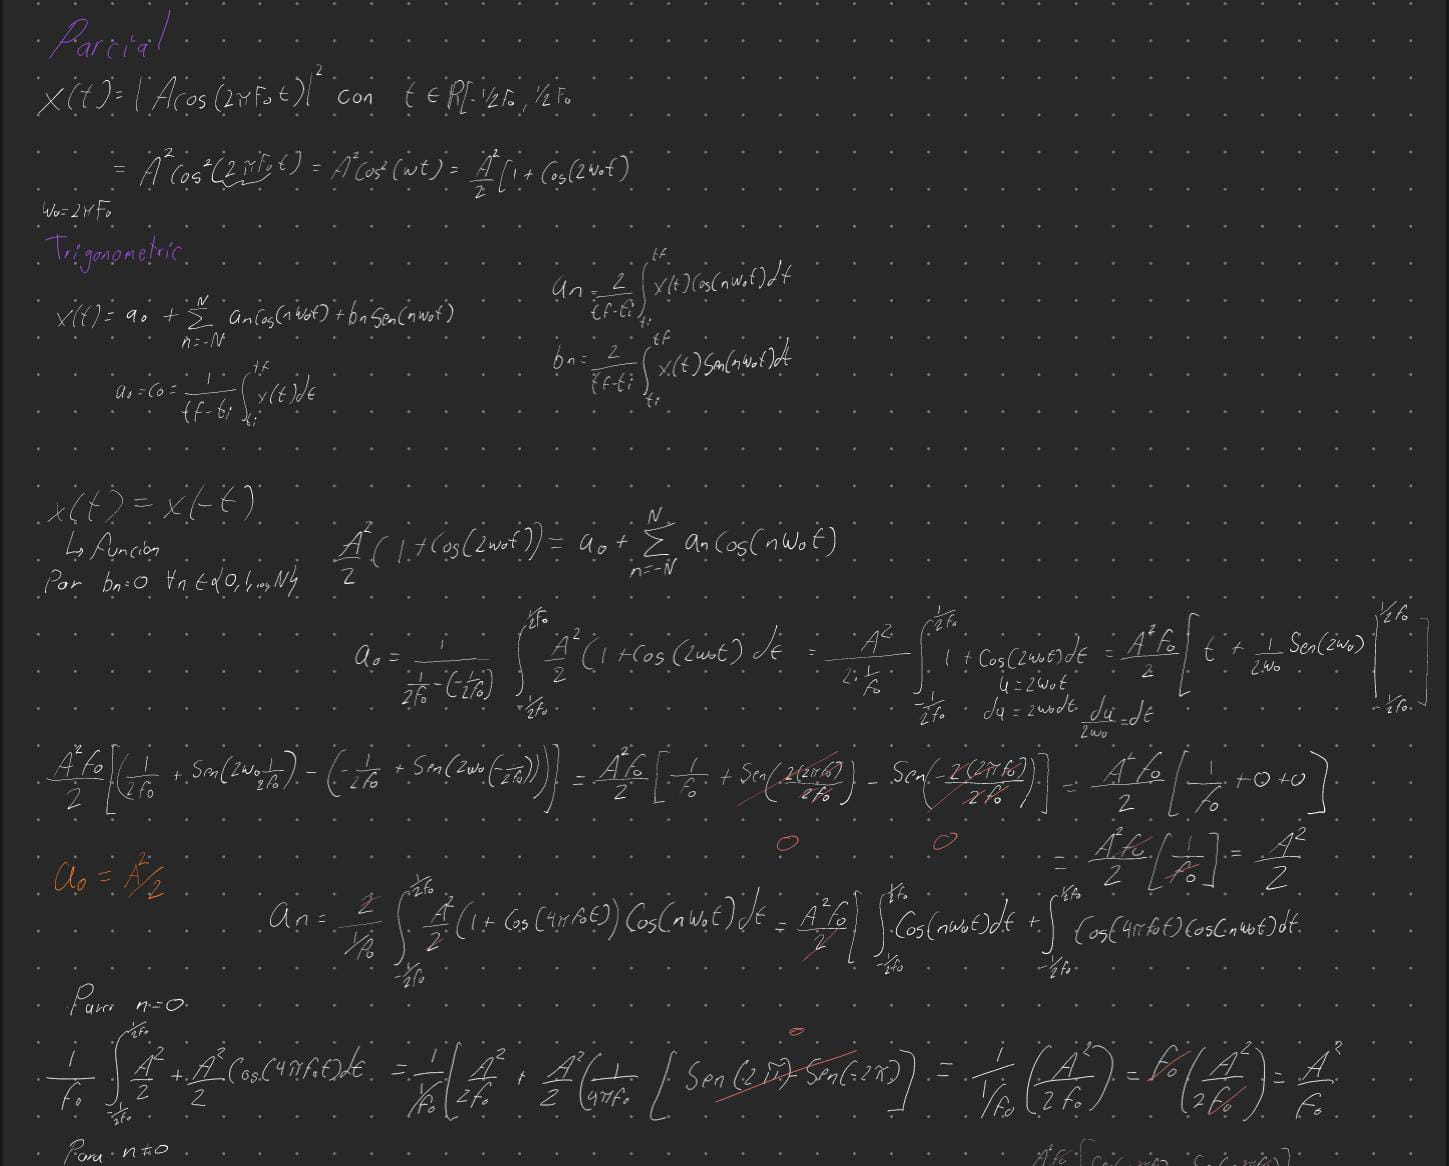

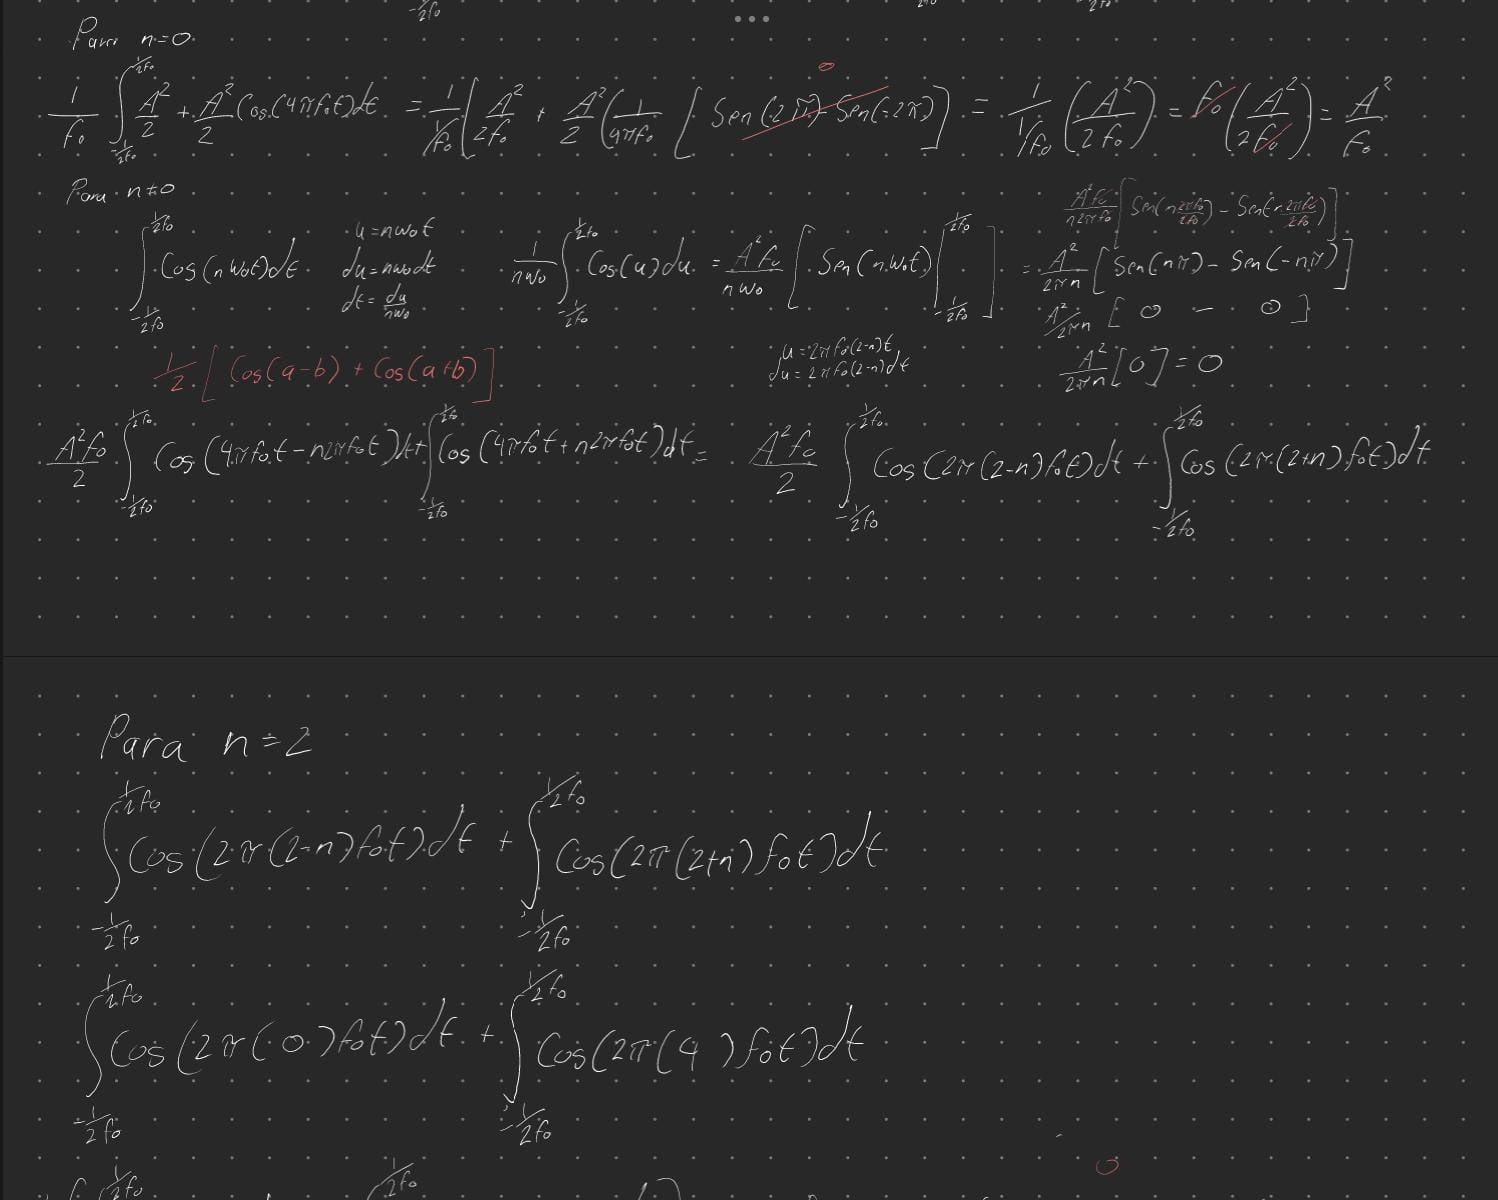

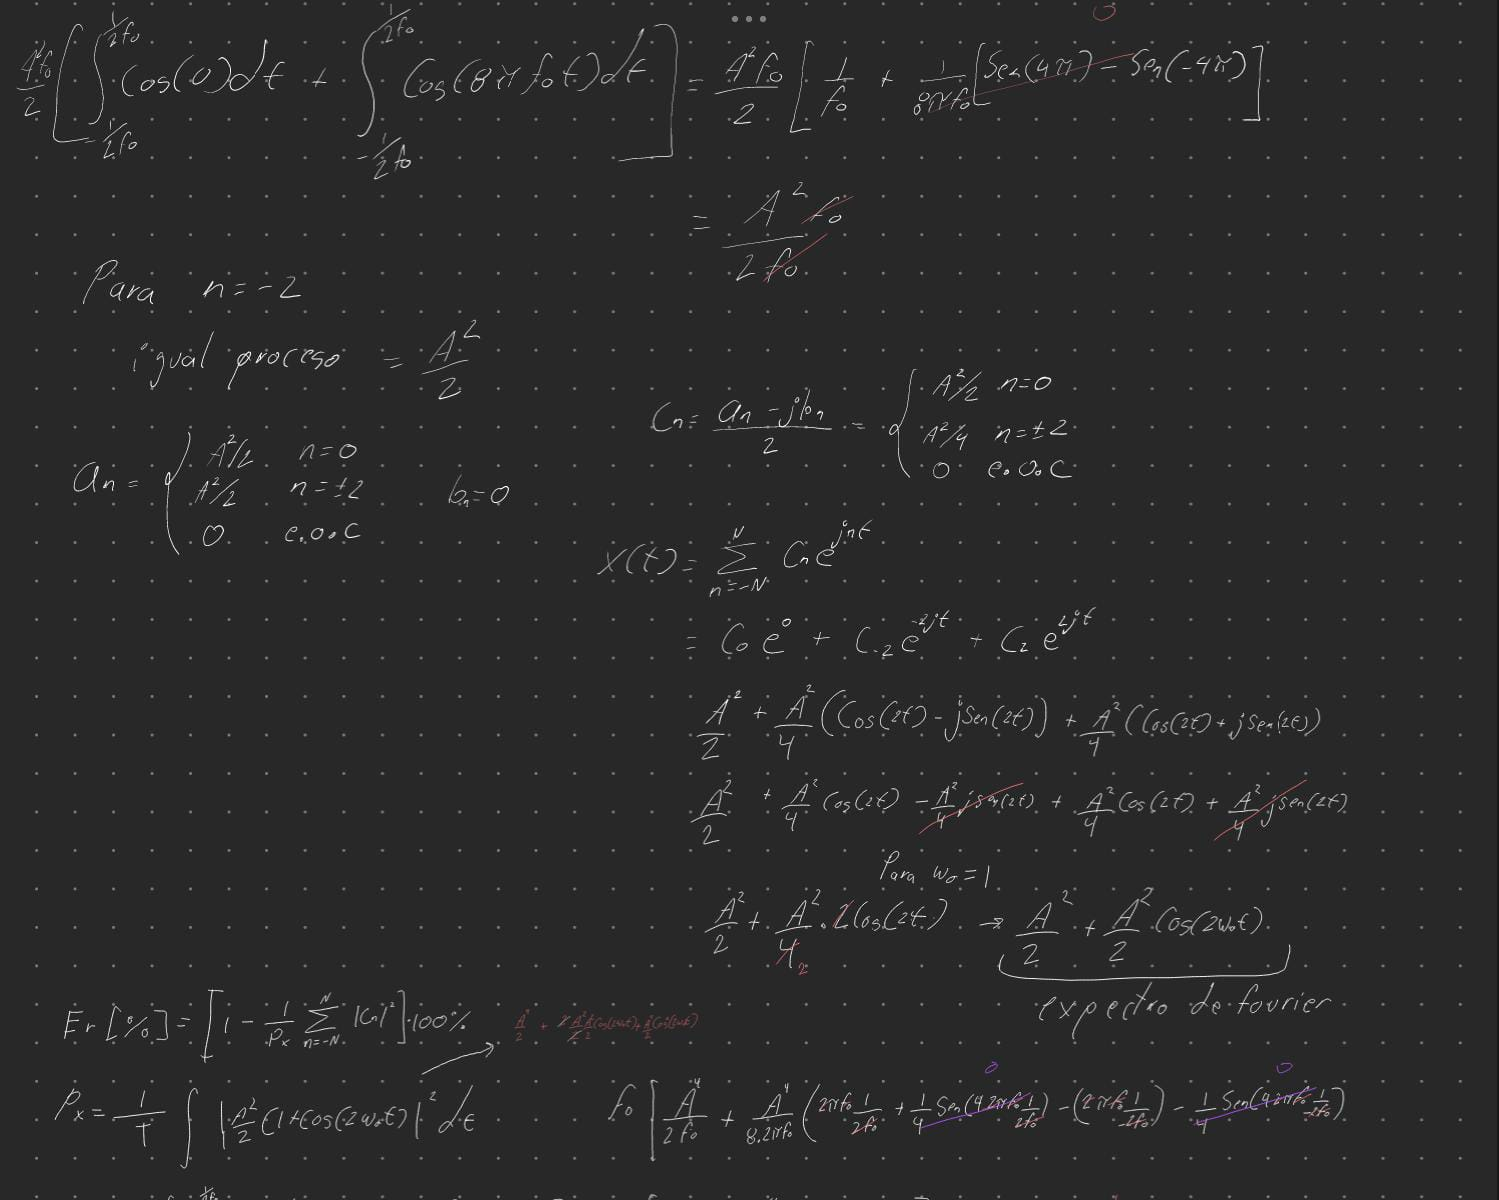

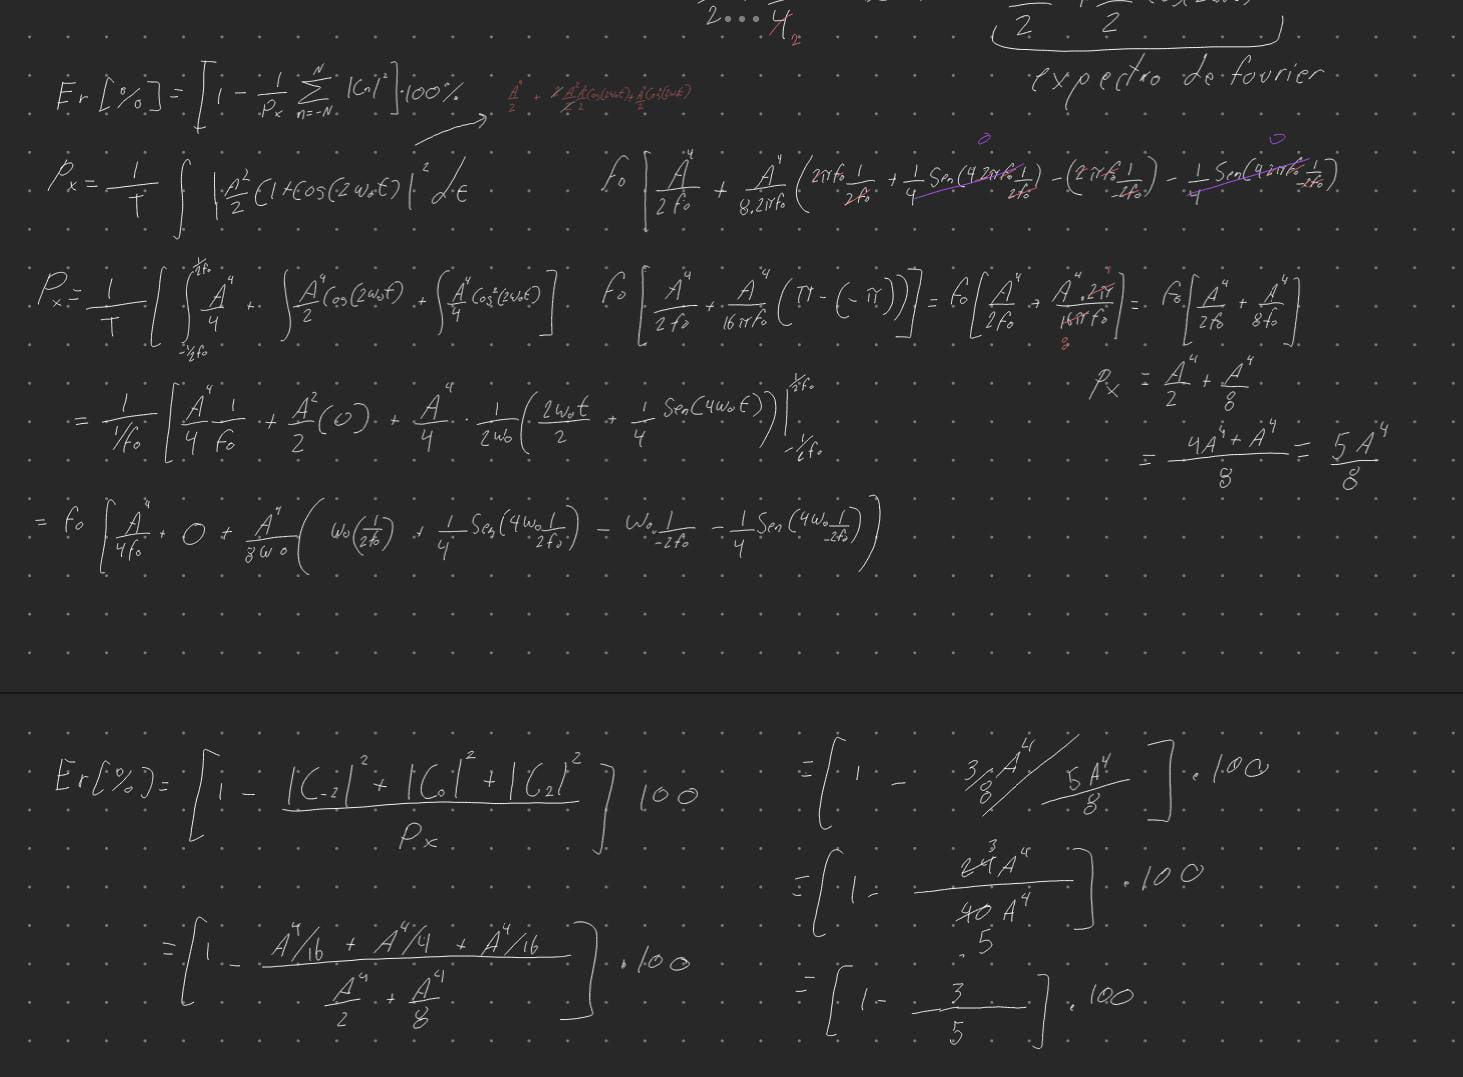

Para expresar la función de manera exponencial, se recurre a la definición de la función coseno:

$$
cos(t) = \frac{e^{it}+e^{-it}}{2}
$$

así, la función $x(t)$ se convierte en

$$
x(t) = \frac{A^2}{2} + \frac{A^2}{2} \frac{e^{2i\omega_0 t}+e^{-2i\omega_0 t}}{2}\\
x(t) = \frac{A^2}{4} e^{-2i\omega_0 t} + \frac{A^2}{2} + \frac{A^2}{4} e^{2i\omega_0 t}
$$

w0 = 12.566370614359172
F0 = 2


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


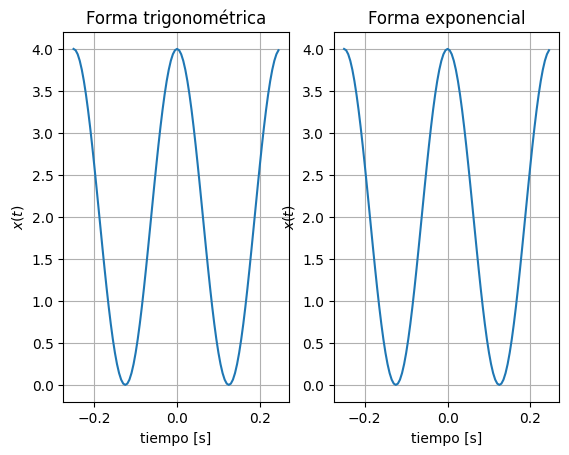

In [ ]:
#Se agregan los parámetros de la señal
A = 2
F0 = 2
w0 = 2 * np.pi * F0
T = 1 / F0

#Se desea visualizar la señal en un periodo completo
ti = -T / 2
tf = T / 2

print('w0 =',w0)
print('F0 =',F0)
Fs = 100 * F0 #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 F0

#Señal en forma trigonométrica
t = np.arange(ti,tf,1/Fs)
x = abs(A * np.cos(w0 * t)) ** 2

#Señal en forma exponencial
x_e = (A**2 / 4) * np.exp(-2j * w0 * t) + (A**2 / 2) + (A**2 / 4) * np.exp(2j* w0 * t)

#Se grafican ambas señales
plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.title('Forma trigonométrica')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, x_e)
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.title('Forma exponencial')
plt.grid()
plt.show()

En la gráfica superior se aprecia como ambas ecuaciones representan la misma señal.

In [ ]:
# Se crean las bases de la serie exponencial compleja de Fourier
N = 10
# definir bases
phi_n = np.zeros((len(t), 2*N + 1), dtype = np.complex_)
for n in range(-N, N + 1, 1):
    phi_n[:, n + N] = np.exp(1j * n * w0 * t)

# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n = 1):
    plt.plot(t, np.real(phi_n[:, int(n + N)]), label = "Re{$\phi_n$(t)}")
    plt.xlabel("t[s]", fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(t, np.imag(phi_n[:, int(n + N)]),label = "Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase, n = (-N, N, 1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

Procederemos a visualizar el espectro de Fourier para la señal

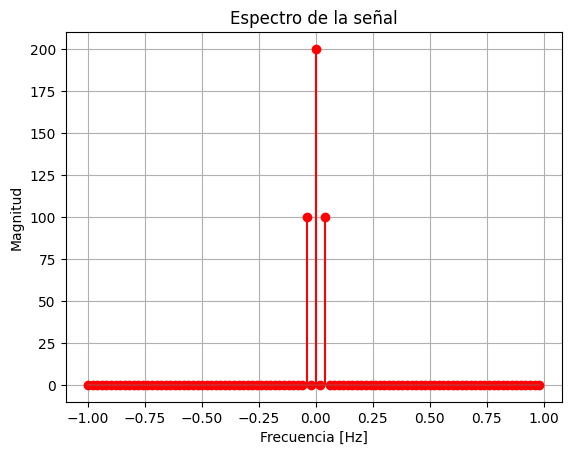

In [ ]:
frecuencies_vector = np.fft.fftfreq(len(x), 1 / F0)
fft_result = np.fft.fft(x)

plt.stem(frecuencies_vector, np.abs(fft_result), 'r')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Espectro de la señal')
plt.grid(True)
plt.show()

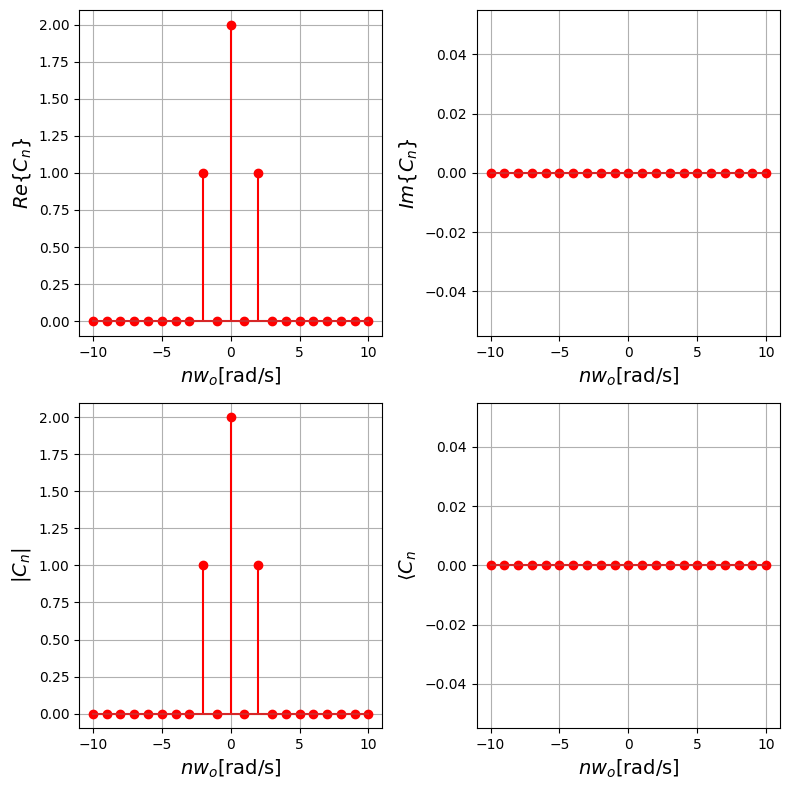

In [ ]:
# Grafica para el espectro de Fourier
c_n = np.zeros(2*N + 1, dtype = np.complex_)
n = np.linspace(-N, N, 2*N + 1)
c_n[N] = (A**2) / 2 # nivel dc C_0
c_n[N - 2] = (A**2) / 4 #armónico -2
c_n[N + 2] = (A**2) / 4 #armónico +2

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(n, np.real(c_n), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(n, np.imag(c_n), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
# Magnitud del espectro
plt.subplot(2,2,3)
plt.stem(n, abs(c_n), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
# Fase del espectro
plt.subplot(2,2,4)
plt.stem(n, np.angle(c_n),'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()
fig.tight_layout()
plt.show()

La señal únicamente tiene componente real, y su face paraa todos los armónicos es cero.
A continuación se aprecia el espectro en decibelios, se omite el diagrama de fase puesto que este es cero para todos los armónicos.

<ipython-input-8-920d0b93a5dc>:1: RuntimeWarning: divide by zero encountered in log10
  decibel_magnitude = 10 * np.log10(abs(c_n))


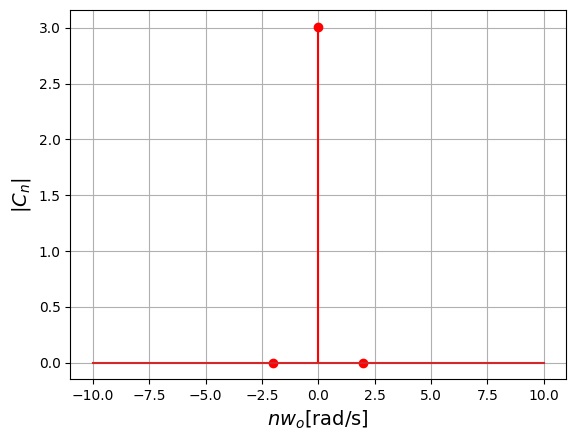

In [ ]:
decibel_magnitude = 10 * np.log10(abs(c_n))

plt.stem(n, decibel_magnitude, 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

In [ ]:
Px = ((A**4)/2)+((A**4)/8) # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe=phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

## Punto 2

Se tiene una señal portadora de la forma $c(t) = A_c sen(2\pi F_c t) = sen(\omega_c t)$ y un mensaje $m$ modelado de tal forma que $m(t) \in \mathbb{R}$. Al modular el mensaje en la amplitud del portador, es decir, aplicar modulación AM, se obtiene la siguiente ecuación:
$$
y(t) = \left(1 + \frac{m(t)}{A_c}\right) A_c sen(\omega_c t)
$$

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathcal{F}\{y(t)\} = \mathcal{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathcal{F}\{c(t)\}+\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathcal{F}\{c(t)\} = \mathcal{F}\{A_c\sin(2\pi F_c t)\} = A_c\mathcal{F}\left\{\frac{e^{2\pi F_ct}-e^{-2\pi F_ct}}{2j}\right\}$$

y

$$\mathcal{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathcal{F}\{m(t)A_c\sin(2\pi F_c t)\} = \mathcal{F}\{m(t)\sin(2\pi F_c t)\} = \mathcal{F}\left\{\frac{m(t)e^{2\pi F_ct}-m(t)e^{-2\pi F_ct}}{2j}\right\}$$

teniendo en cuenta que:

$$\mathcal{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$
\boxed{\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}
$$

Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$

Se importarán los paquetes necesarios.

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

     / 2.7 MB 10.4 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2929036 sha256=660b16497981bdcd943742f73cb4ec4b82cbb53a2490e1158395591b262e4b13
  Stored in directory: /tmp/pip-ephem-wheel-cache-8sb6i8hu/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [ ]:
# Se importa la canción "The line" desde youtube music directamente en formato wav
link="https://music.youtube.com/watch?v=cOfFWiVMUXs&list=RDAMVMcOfFWiVMUXs"
!yt-dlp --extract-audio -o "TheLine" --audio-format wav {link}

[youtube] Extracting URL: https://music.youtube.com/watch?v=cOfFWiVMUXs
[youtube] cOfFWiVMUXs: Downloading webpage
[youtube] cOfFWiVMUXs: Downloading tv client config
[youtube] cOfFWiVMUXs: Downloading player 9c6dfc4a
[youtube] cOfFWiVMUXs: Downloading tv player API JSON
[youtube] cOfFWiVMUXs: Downloading ios player API JSON
[youtube] cOfFWiVMUXs: Downloading m3u8 information
[info] cOfFWiVMUXs: Downloading 1 format(s): 251
[download] Destination: TheLine
[download] 100% of    3.04MiB in 00:00:00 at 20.59MiB/s
[ExtractAudio] Destination: TheLine.wav
Deleting original file TheLine (pass -k to keep)


In [ ]:
import soundfile as sf
from IPython.display import Audio

# Leemos el archivo descargado
song = "TheLine.wav"
x, fs = sf.read(song)
print('Frecuencia de muestreo: %.2f[Hz] \ncanción: %s' % (fs,song))
x.shape

Frecuencia de muestreo: 48000.00[Hz] 
canción: TheLine.wav


(9216000, 2)

Luego de leer la canción, se deben extraer y vectorizar sus datos. Para efectos de la simmulación, se tomarán únicamente 5 segundos de la canción.

In [ ]:
# Tomamos una muestra de 5 segundos de la canción
t0 = 5
tf = 10
sample = x[fs * t0 : fs * tf, :]
Audio(sample.T, rate = fs)

Para la señal portadora usaremos una frecuancia de 150 Hz. Procedemos a calcular el vector de tiempo correspondiente y a graficar tanto la señal portadora como ambos canales del mensaje.

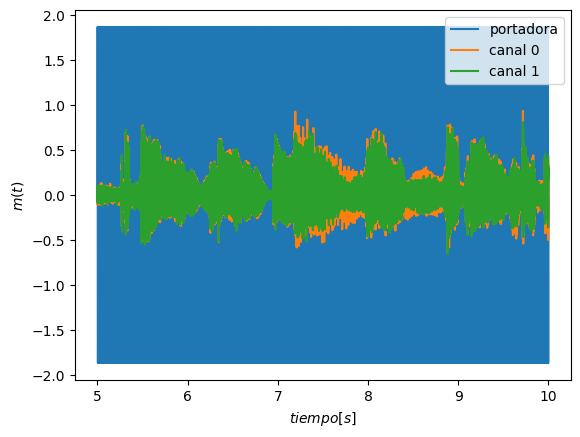

In [ ]:
t = np.arange(t0, tf, 1 / fs)

Fc = 150
I_m = 0.5 # Indice de modulación
A_c = max(sample[:, 0]) / I_m
c = A_c * np.sin(2 * np.pi * Fc * t)

plt.plot(t, c, label = "portadora")
plt.plot(t, sample[:, 0], label = "canal 0")
plt.plot(t, sample[:, 1], label = "canal 1")
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

Se usará el canal 0 del audio como mensaje a modular.

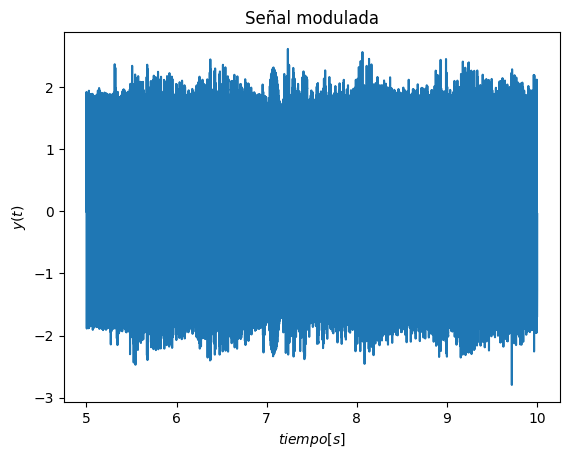

In [ ]:
y = (1 + sample[:, 0] / A_c) * c

plt.plot(t, y)
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.title('Señal modulada')
plt.show()

In [ ]:
Audio(y, rate = fs)

Se aprecia una distorción exesiva en el mensaje. En la gráfica se puede apreciar como la forma original sel mensaje se pierde prácticamente en su totalidad, eliminando los mínimos y atenuando con respecto a estos mismos los máximos.

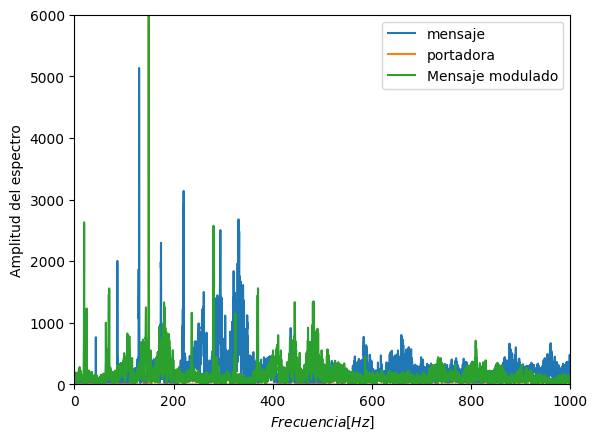

In [ ]:
# Transformada de Fourier para la señal portadora, la señal mensaje y la señal modulada
message = np.fft.rfft(sample[:, 0])
C_w = np.fft.rfft(c)
Y_w = np.fft.rfft(y)
f = np.fft.rfftfreq(len(c), 1 / fs)

plt.plot(f, abs(message), label = "mensaje")
plt.plot(f, abs(C_w), label = "portadora")
plt.plot(f, abs(Y_w), label = "Mensaje modulado")
plt.ylabel('Amplitud del espectro')
plt.xlabel('$Frecuencia [Hz]$')
plt.xlim(0, 1000)
plt.ylim(0, 6000)
plt.legend()
plt.show()

En el espectro de frecuencia se puede ver la gran diferencia que hay entre la sseñal original y la modulada. La señal modulada sigue fuertemente a la señal portadora en los 150 MHz y aparecen picos relativamente elevados a sus alrededores, contribuyendo a la distorcion del mensaje original.

#Punto 3

Ingrese el valor de R deseado:5
Ingrese el valor de C deseado:6
THD para carga resistiva pura: 3418.7258
THD para carga RC: 64.4389


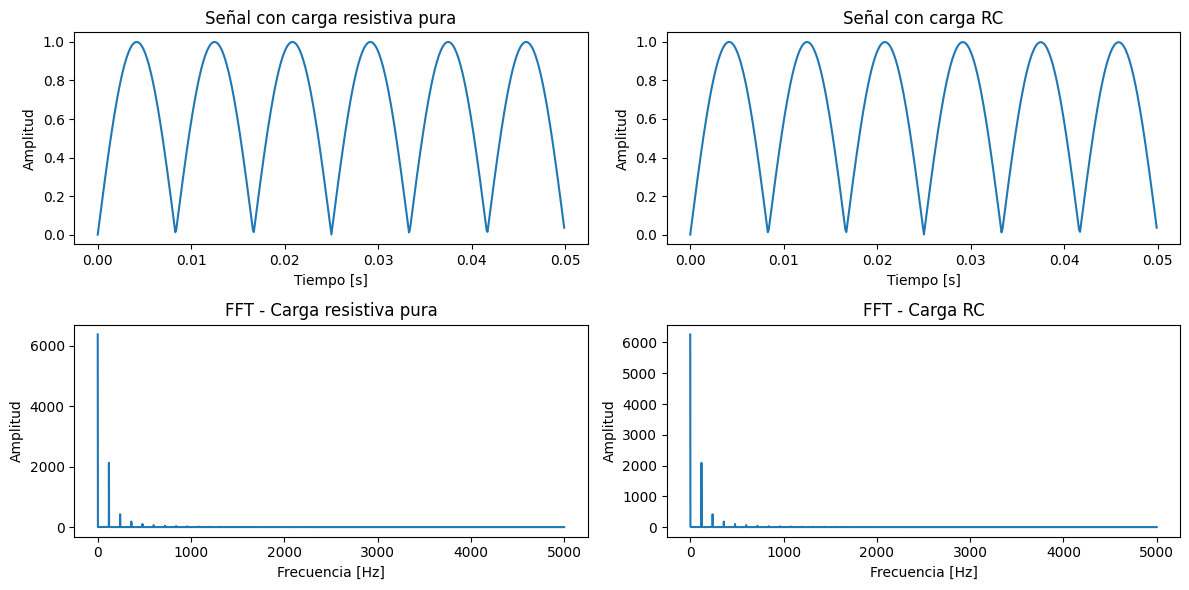

In [ ]:
 from scipy.fft import fft, fftfreq

# Parámetros del sistema
sampling_rate = 10000  # Frecuencia de muestreo
T = 1.0 / sampling_rate  # Intervalo de tiempo
t = np.linspace(0, 1.0, sampling_rate)


# Generar señal del rectificador de onda completa
def rectificador_onda_completa(t, f, R, C = None):
    # Onda senoidal fundamental
    signal = np.abs(np.sin(2 * np.pi * f * t))

    if C is not None:
        # Respuesta para carga RC
        tau = R * C
        signal = signal * np.exp(-t / tau)

    return signal


# Calcular la FFT y los armónicos
def calcular_fft(signal, sampling_rate):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)[:N // 2]
    return xf, np.abs(yf[:N // 2])

# Calcular THD
def calcular_thd(yf):
    V1 = yf[1]  # El primer armónico
    harmonics = np.sqrt(np.sum(yf[2:]**2))
    thd = harmonics / V1
    return thd


# Parámetros de la simulación
f = 60  # Frecuencia de la señal de entrada (50 Hz)
R = float(input("Ingrese el valor de R deseado:"))  # Valor de la resistencia (ohmios)
C = float(input("Ingrese el valor de C deseado:"))  # Valor del condensador (faradios)

# Simulación para carga resistiva pura
signal_resistiva = rectificador_onda_completa(t, f, R)

# Simulación para carga RC en serie
signal_rc = rectificador_onda_completa(t, f, R, C)

# FFT de ambas señales
xf_res, yf_res = calcular_fft(signal_resistiva, sampling_rate)
xf_rc, yf_rc = calcular_fft(signal_rc, sampling_rate)

# Calcular THD
thd_resistiva = calcular_thd(yf_res)
thd_rc = calcular_thd(yf_rc)

print(f"THD para carga resistiva pura: {thd_resistiva:.4f}")
print(f"THD para carga RC: {thd_rc:.4f}")



# Graficar señales y su espectro
plt.figure(figsize=(12, 6))

# Señal en el dominio del tiempo
plt.subplot(2, 2, 1)
plt.plot(t[:500], signal_resistiva[:500])
plt.title("Señal con carga resistiva pura")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(2, 2, 2)
plt.plot(t[:500], signal_rc[:500])
plt.title("Señal con carga RC")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# FFT de las señales
plt.subplot(2, 2, 3)
plt.plot(xf_res, yf_res)
plt.title("FFT - Carga resistiva pura")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.subplot(2, 2, 4)
plt.plot(xf_rc, yf_rc)
plt.title("FFT - Carga RC")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

### Punto 4


# Punto 4


Como primer paso escribimos una función que procesa las señales de audio con las que trabajaremos. La función básicamente usa la transformada de Fourier para extraer de la señal su espectro de frecuencia y sus magnitudes, pero antes aplica una ventana a la señal para reducir y filtrar las fugas espectrales.

Si al invocar la función no se especifica una frecuencia de muestreo, se usará una frecuencia predeterminada de 16 kHz, que es suficiente para la gran mayoría de tonos vocales humanos.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import json
import glob
import os

def compute_fft(signal, fs = 16000):
    # Aplicar ventana de Hamming para reducir fugas espectrales
    window = np.hamming(len(audio))
    audio_windowed = signal * window

    # Calcular FFT
    fft = np.fft.rfft(audio_windowed)
    magnitudes = np.abs(fft)  # Magnitudes normalizadas
    freqs = np.fft.rfftfreq(len(signal), 1 / fs)
    return freqs, magnitudes

# def extract_huella(audio, sample_rate=16000):
#     # Calcular MFCCs (Mel-Frequency Cepstral Coefficients)
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
#     mfccs_mean = np.mean(mfccs, axis=1)
#     return mfccs_mean

También se importan algunas librerías para poder crear la base de datos y manipular los archivos de audio.
Ahora importaremos el drive para cargar los audios con las voces.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se creará la base de datos de la siguiente forma:

In [ ]:
# /Palabras Clave SyS
#   ├── /database/                # Base de datos de usuarios
#   │    ├── user1.json           # Patrón de usuario 1
#   │    ├── user2.json           # Patrón de usuario 2
#   │    └── user3.json           # Patrón de usuario 3
#   └── app.py                    # Dashboard en Streamlit

In [33]:
def register_user(name, keyword, spectre):
    os.makedirs("database", exist_ok=True)
    user_data = {
        "nombre": name,
        "palabra clave": keyword,
        "espectro": spectre
    }
    with open(f"database/{name}.json", "w") as file:
        json.dump(user_data, file)

Primeramente se procesarán los audos para cada persona.

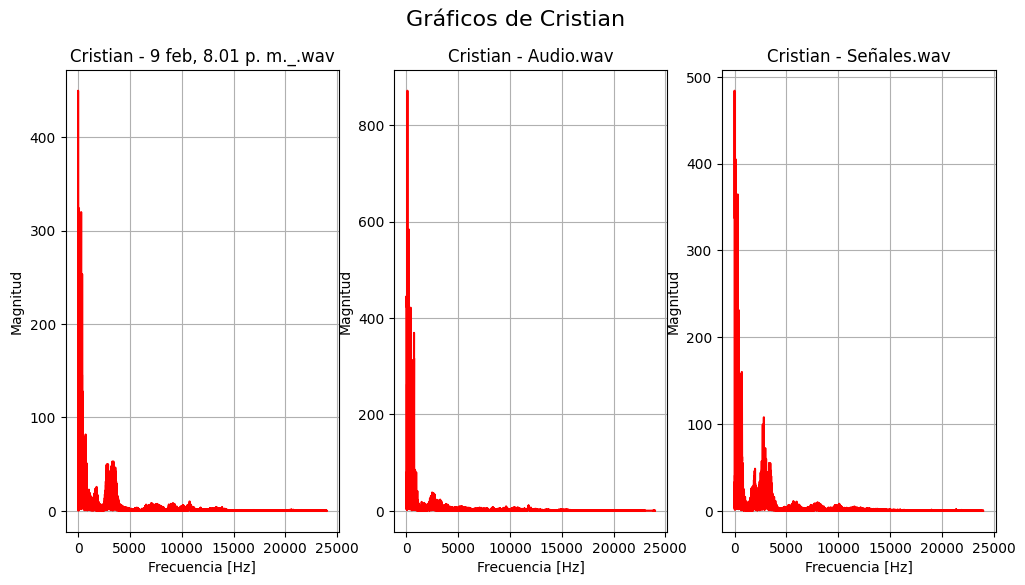

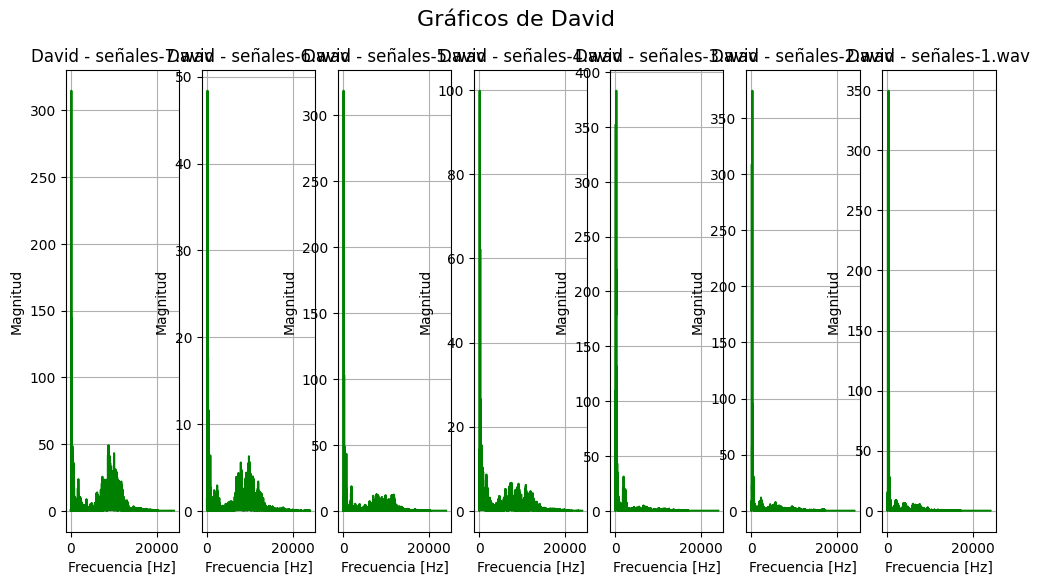

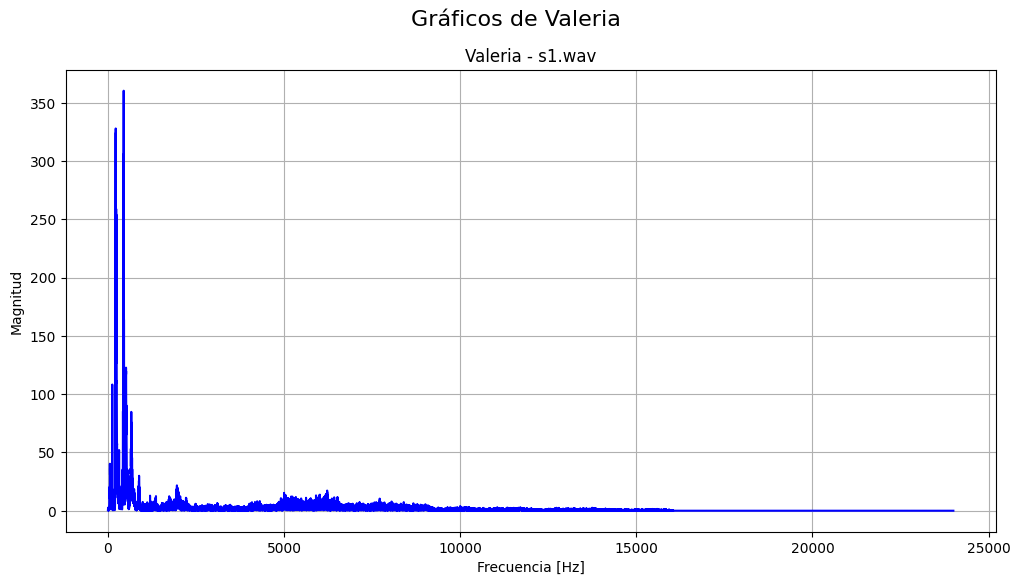

In [23]:
users = ['Cristian', 'David', 'Valeria']
colors = ['r', 'g', 'b']

for user, color in zip(users, colors):
    path = '/content/drive/MyDrive/Palabras Clave - SyS/database/' + user
    audio_files = glob.glob(os.path.join(path, '*.wav'))
    plt.figure(figsize=(12, 6))
    for idx, audio_file in enumerate(audio_files):
        audio, sample_rate = librosa.load(audio_file, sr=None)
        freqs, norm = compute_fft(audio, sample_rate)

        plt.subplot(1, len(audio_files), idx + 1)
        plt.plot(freqs, norm, color=color)
        plt.xlabel('Frecuencia [Hz]')
        plt.ylabel('Magnitud')
        plt.title(f"{user} - {os.path.basename(audio_file)}")
        plt.grid(True)
    plt.suptitle(f"Gráficos de {user}", fontsize=16)
    plt.show()

Para procesar los datos se hizo el promedio de los espectros de cada audio registado con la palabra y se almacenaron esos valores como una lista en la base de datos.

In [35]:
for user in users:
    all_frecuencies = []
    all_magnitudes = []
    path = '/content/drive/MyDrive/Palabras Clave - SyS/database/' + user
    audio_files = glob.glob(os.path.join(path, '*.wav'))
    for audio in audio_files:
        audio, sample_rate = librosa.load(audio, sr=None)
        freqs, norm = compute_fft(audio, sample_rate)

        all_frecuencies.append(freqs)
        all_magnitudes.append(norm)

    # Se ajustan las longitudes de los arrays para que numpy no de problemas
    max_len = max(len(arr) for arr in all_frecuencies)
    padded_frecuencies = [np.pad(arr, (0, max_len - len(arr)), 'constant') for arr in all_frecuencies]
    padded_magnitudes = [np.pad(arr, (0, max_len - len(arr)), 'constant') for arr in all_magnitudes]

    frecuencies = np.array(padded_frecuencies)
    magnitudes = np.array(padded_magnitudes)

    mean_frecuency = np.mean(frecuencies, axis=0)
    mean_magnitude = np.mean(magnitudes, axis=0)
    # plt.plot(mean_frecuency, mean_magnitude)
    # plt.show()
    register_user(user, 'Señales', {'frecuencias': mean_frecuency.tolist(), 'magnitudes': mean_magnitude.tolist()})

Ahora se crea una función que relacione el espectro de nuevos audios con los espectros almacenados en la base de datos. Para esto se normalizan ambos espectros y posteriormente se calcula su correlación.

In [40]:
def audio_comparation(audio, user):
    with open(f"database/{user}.json", "r") as file:
        user_data = json.load(file)

    user_frecuencies = np.array(user_data["espectro"]["frecuencias"])
    user_magnitudes = np.array(user_data["espectro"]["magnitudes"])
    normalized_user_freqs = user_frecuencies / np.max(user_frecuencies)
    normalized_user_magnitudes = user_magnitudes / np.max(user_magnitudes)

    input_freqs, input_magnitudes = compute_fft(audio)
    normalized_input_freqs = input_freqs / np.max(input_freqs)
    normalized_input_magnitudes = input_magnitudes / np.max(input_magnitudes)

    correlation_freqs = np.correlate(normalized_user_freqs, normalized_input_freqs, mode='same')
    correlation_magnitudes = np.correlate(normalized_user_magnitudes, normalized_input_magnitudes, mode='same')
    max_correlation_freq = np.argmax(correlation_freqs)
    max_correlation_magnitude = np.argmax(correlation_magnitudes)

    return max_correlation_freq, max_correlation_magnitude

Finalmente todo se monta en el dashboard.

In [36]:
!pip install streamlit sounddevice

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import sounddevice as sd
import numpy as np
import json

# Configuración
st.title("🔒 Sistema de Autenticación por Voz")
st.markdown("Pronuncia la palabra clave 'Señales' para verificar tu identidad.")

# Grabación de audio
def grabar_audio():
    audio = sd.rec(int(3 * 16000), samplerate=16000, channels=1)
    sd.wait()
    return audio.flatten()

# Procesamiento
if st.button("Iniciar Autenticación"):
    audio = grabar_audio()
    freqs, magnitudes = compute_fft(audio)

    # Verificar para cada usuario
    acceso = False
    for usuario in ["Cristian", "David", "Valeria"]:
        frecuency_corr, magnitude_corr = audio_comparation(audio, usuario)
        if frecuency_corr > 0.7 and magnitude_corr > 0.6:
            acceso = True
            break

    if acceso:
        st.success("✅ Acceso concedido. ¡Bienvenido!")
    else:
        st.error("❌ Acceso denegado. Palabra clave o hablante no reconocido.")

In [46]:
!streamlit run Parcial_2.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.125.6.22


In [47]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦^C
